# Moving Average Filter Javascript
<p align="left">
<img src="./img/businesscard.jpg" width="500px" alt="Business Card" align="left" >
</p>
<br>

[www.rptecnologias.com](http://www.rptecnologias.com)
<br>
guitars.ai@rptecnologias.com


## Imports

In [1]:
// Imports
import java.util.Arrays;
import java.lang.Math;
import java.io.FileWriter;
import java.io.IOException;
import java.util.ArrayList;
import java.util.List;

## Function Moving Average h

In [2]:
// Define hMovingAverage
public static double[] hMovingAverage(int taps)
{
     
    double h[] = new double[taps];
    for(int i=0; i<h.length;++i)
    {
        h[i]=(1.0/taps);
    }
    return h;
}

In [3]:
// Create an impulse response h for a Moving Average Filter
double h[]=hMovingAverage(11);
System.out.println(Arrays.toString(h));

[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


## Function Convolution1D

In [4]:
// Define Convolution1D
public static double[] Convolution1D (double f[], double g[], boolean delay)
{
    // Initialize output array with zeros
    double y[] = new double[f.length+g.length-1];
    
    //Convolution
    for (int n=0; n < f.length; ++n)
    {
        for(int m=0; m<g.length;++m)
            {
                y[m+n]+=f[n]*g[m];
            }
    
    }
    
    if(delay)
    {
        int index=(int)Math.round((g.length-1)/2.0);
        return Arrays.copyOfRange(y, index, y.length-g.length+1);
    }
    else
    {    return y; }
    
}

## Function Linspace

In [5]:
// Function Linspace
public static double[] linspace(double a, double b, int n){
    double[] result = new double[n];
    for (int i=0; i<n; i++){
    result[i]= a +i*(b-a)/(n-1);
    }
    return result;
}

## Create Signals: Ramp and Ramp + Noise

In [6]:
double[] x = linspace(0, 100, 100);
double[] x_noise = new double[x.length];

for (int i = 0; i < x.length; i++) {
  x_noise[i]=x[i]+ 4*(Math.random()*2-1);
}

## Convolve Ramp + Noise with Moving Average Impulse Response

In [7]:
double[] x_noise_filtered = Convolution1D(x_noise, h, true)

## Function to save signals as .csv files

In [8]:
public static void writeToCsv(String fileName, double[] arr) {
         
         
        FileWriter fileWriter = null;
                 
        try {
            fileWriter = new FileWriter(fileName);
 
            
            for (double i : arr) {
                fileWriter.append(Double.toString(i));
                fileWriter.append(",");
            }
  
             
        } catch (Exception e) {
            System.out.println("Error.");
            e.printStackTrace();
        } finally {
             
            try {
                fileWriter.flush();
                fileWriter.close();
            } catch (IOException e) {
                System.out.println("Error.");
                e.printStackTrace();
            }
             
        }
    }

## Save Ramp+Noise as .csv file

In [9]:
writeToCsv("x_noise_java.csv",x_noise);
writeToCsv("x_noise_filtered_java.csv", x_noise_filtered );

## Read .csv File as Numpy Array

In [10]:
# Imports
from numpy import genfromtxt

In [11]:
# Read .csv as numpy array
x_noise = genfromtxt("x_noise_java.csv", delimiter=',')
x_noise_filtered = genfromtxt("x_noise_filtered_java.csv", delimiter=',')

In [12]:
import matplotlib.pyplot as plt

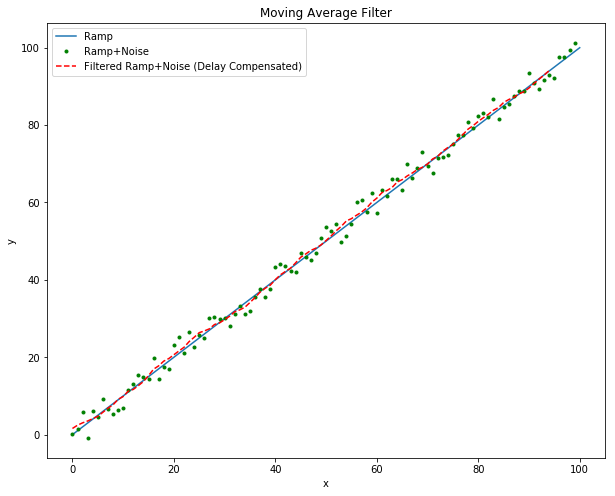

In [13]:
plt.figure(figsize=(10,8))
plt.title("Moving Average Filter")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(range(x_noise.size), label='Ramp')
plt.plot(x_noise, 'g.', label='Ramp+Noise')
plt.plot(x_noise_filtered, 'r--', label='Filtered Ramp+Noise (Delay Compensated)')
plt.legend();